In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:04<00:00, 203MB/s]
100% 1.06G/1.06G [00:04<00:00, 255MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [5]:
#generators-divide into batches

train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#those files are stored as numpy array which consists value from 0 to 255 so we need to convert form 0 to 1
#normalize

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
test_ds = test_ds.map(process)

In [7]:
# Create CNN model
#using three filters

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 59s 82ms/step - loss: 0.6044 - accuracy: 0.6601 - val_loss: 0.5295 - val_accuracy: 0.7444
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.4705 - accuracy: 0.7738 - val_loss: 0.4463 - val_accuracy: 0.7916
Epoch 3/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3631 - accuracy: 0.8332 - val_loss: 0.4931 - val_accuracy: 0.7808
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2335 - accuracy: 0.9029 - val_loss: 0.5993 - val_accuracy: 0.7740
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1227 - accuracy: 0.9537 - val_loss: 0.8138 - val_accuracy: 0.7698
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0731 - accuracy: 0.9733 - val_loss: 0.9226 - val_accuracy: 0.7638
Epoch 7/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0560 - accuracy: 0.9811 - val_loss: 0.9455 - val_accuracy:

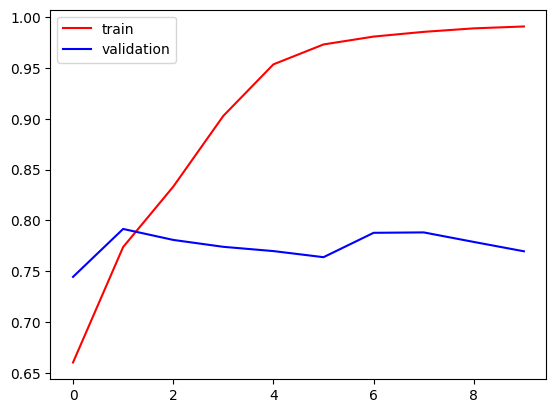

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

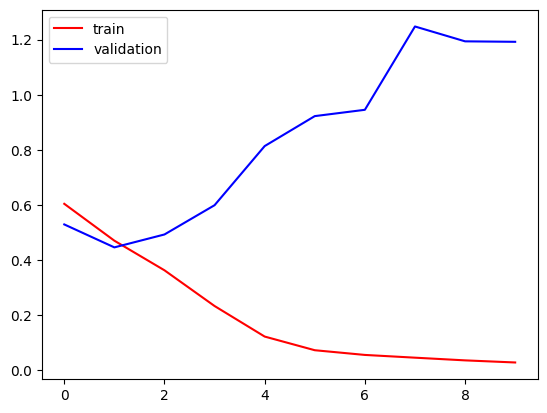

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
#To reduce overfitting

from keras.layers import BatchNormalization,Dropout

In [16]:
# Create CNN model
#using three filters

model1 = Sequential()

model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model1.add(Flatten())

model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))

In [19]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [20]:
history2 = model1.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 69s 103ms/step - loss: 1.5690 - accuracy: 0.5818 - val_loss: 0.6448 - val_accuracy: 0.6266
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6032 - accuracy: 0.6865 - val_loss: 0.6826 - val_accuracy: 0.6708
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5425 - accuracy: 0.7324 - val_loss: 0.4919 - val_accuracy: 0.7706
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4468 - accuracy: 0.7953 - val_loss: 0.4754 - val_accuracy: 0.7754
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3969 - accuracy: 0.8227 - val_loss: 0.4936 - val_accuracy: 0.7390
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3280 - accuracy: 0.8577 - val_loss: 0.4910 - val_accuracy: 0.7612
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2543 - accuracy: 0.8918 - val_loss: 0.4965 - val_ac

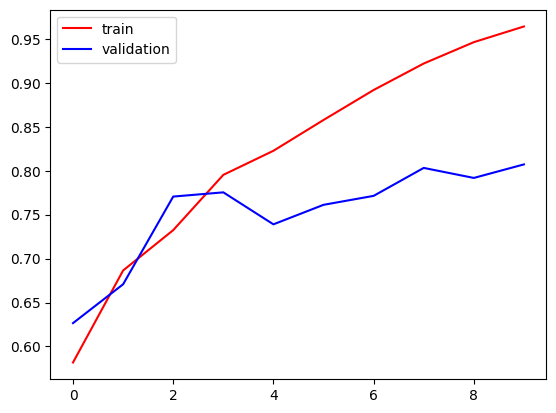

In [23]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

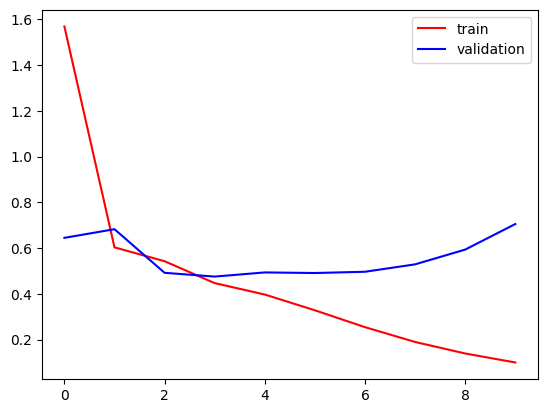

In [24]:
plt.plot(history2.history['loss'],color='red',label='train')
plt.plot(history2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [42]:
test_img = cv2.imread('/content/dog.jpg')

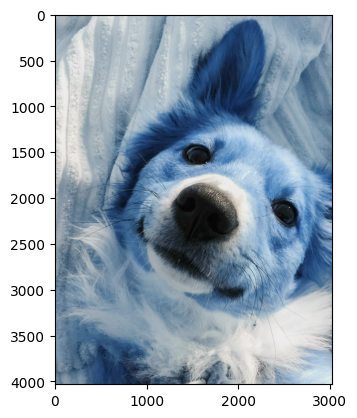

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(4032, 3024, 3)

In [45]:
test_img = cv2.resize(test_img,(256,256))

In [46]:
test_input = test_img.reshape((1,256,256,3))

In [47]:
img = model1.predict(test_input)

1/1 [==============================] - 0s 19ms/step


In [48]:
if(img == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

Our model says it is a : dog
